In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Mall_Customers.csv")

# Display first few rows
print("First 5 Rows of Dataset:")
print(df.head())

# Show dataset info
print("\nDataset Info:")
print(df.info())

# Check for missing values
print("\nMissing Values Count:")
print(df.isnull().sum())


First 5 Rows of Dataset:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

Missing Va

In [3]:
# Rename columns for consistency
df.columns = ["CustomerID", "Gender", "Age", "Annual_Income", "Spending_Score"]

# Convert CustomerID to string (as it's not numeric)
df["CustomerID"] = df["CustomerID"].astype(str)

# Display new column names
print("\nUpdated Column Names:")
print(df.columns)



Updated Column Names:
Index(['CustomerID', 'Gender', 'Age', 'Annual_Income', 'Spending_Score'], dtype='object')


In [4]:
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)

# If missing values exist, fill with median values (alternative: drop them)
df.fillna(df.median(numeric_only=True), inplace=True)
print("\nMissing values handled successfully.")



Missing Values:
CustomerID        0
Gender            0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64

Missing values handled successfully.


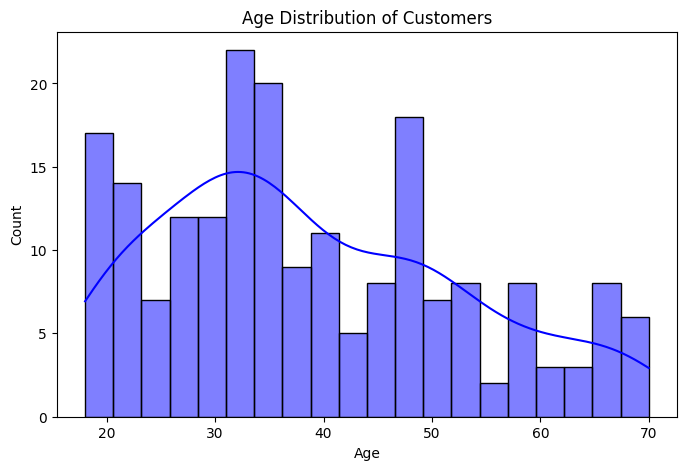

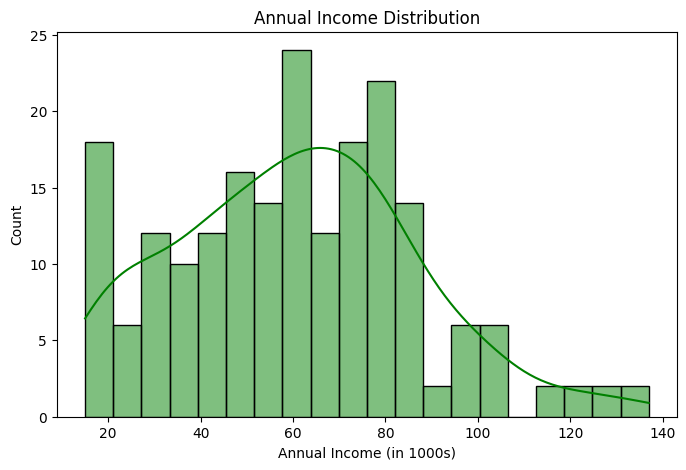

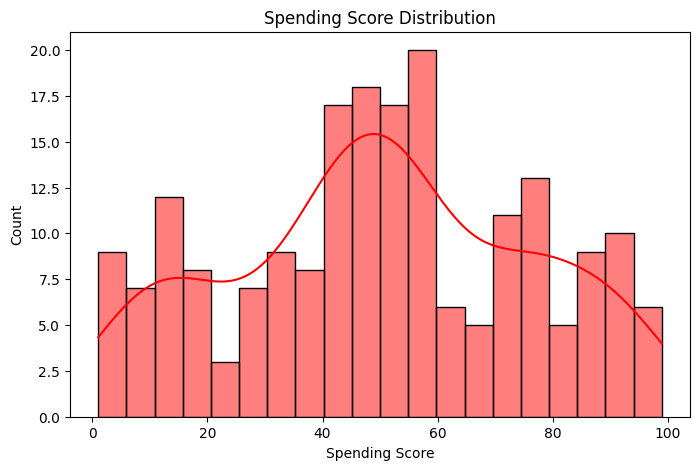

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Age
plt.figure(figsize=(8,5))
sns.histplot(df["Age"], bins=20, kde=True, color="blue")
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Distribution of Annual Income
plt.figure(figsize=(8,5))
sns.histplot(df["Annual_Income"], bins=20, kde=True, color="green")
plt.title("Annual Income Distribution")
plt.xlabel("Annual Income (in 1000s)")
plt.ylabel("Count")
plt.show()

# Distribution of Spending Score
plt.figure(figsize=(8,5))
sns.histplot(df["Spending_Score"], bins=20, kde=True, color="red")
plt.title("Spending Score Distribution")
plt.xlabel("Spending Score")
plt.ylabel("Count")
plt.show()


In [6]:
from sklearn.cluster import KMeans
import numpy as np

# Selecting the relevant features
X = df[['Annual_Income', 'Spending_Score']]

# Display first 5 rows of selected features
print("\nSelected Features for Clustering:")
print(X.head())



Selected Features for Clustering:
   Annual_Income  Spending_Score
0             15              39
1             15              81
2             16               6
3             16              77
4             17              40


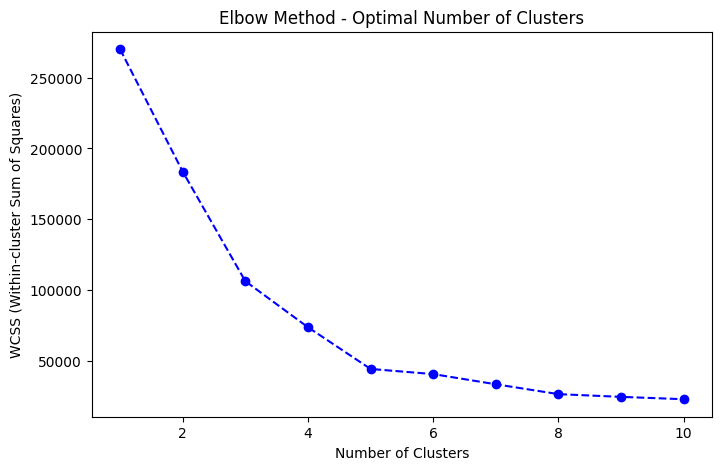

In [7]:
wcss = []  # Within-cluster sum of squares

# Testing cluster sizes from 1 to 10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='blue')
plt.title("Elbow Method - Optimal Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS (Within-cluster Sum of Squares)")
plt.show()


In [8]:
# Set optimal cluster count (usually 4 or 5 from elbow method)
optimal_clusters = 4

# Train the K-Means model
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Display first few rows with assigned clusters
print("\nCluster Assignment for First 5 Customers:")
print(df[['Annual_Income', 'Spending_Score', 'Cluster']].head())



Cluster Assignment for First 5 Customers:
   Annual_Income  Spending_Score  Cluster
0             15              39        0
1             15              81        2
2             16               6        0
3             16              77        2
4             17              40        0


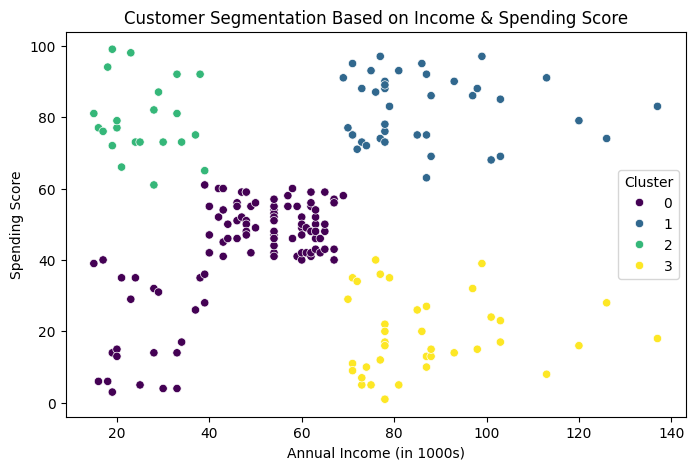

In [9]:
# Scatter plot of customer segments
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Annual_Income"], y=df["Spending_Score"], hue=df["Cluster"], palette="viridis")
plt.title("Customer Segmentation Based on Income & Spending Score")
plt.xlabel("Annual Income (in 1000s)")
plt.ylabel("Spending Score")
plt.legend(title="Cluster")
plt.show()


In [10]:
# Save the clustered data to CSV for Power BI
df.to_csv("customer_segmentation_results.csv", index=False)

print("\nCustomer Segmentation Data Saved Successfully!")



Customer Segmentation Data Saved Successfully!
